# Topics 

## 1. Multi-layer Forward-feed NN from sklearn




In [1]:
%matplotlib inline
# All imports

from random import choice
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import time
from IPython import display


# from sklearn.neural_network import MLPClassifier
np.set_printoptions(formatter={'float': '{:.5f}'.format})


In [2]:
import sklearn
print(sklearn.__version__)

from sklearn.neural_network import MLPClassifier
#Multi Layer Perceptron Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

0.23.1


In [3]:
X = [[0., 0.], [1., 1.]]
y = [0, 1]
# (4, 2) means: 2 inputs, 4 neaurons in 2 hidden layers, 1 output
clf = MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(4, 2))
clf.fit(X, y)

MLPClassifier(alpha=1e-10, hidden_layer_sizes=(4, 2), solver='lbfgs')

In [4]:
X_test = [[2., 2.], [-1., -2.]]
clf.predict(X_test)

array([1, 0])

In [5]:
X_test2 = [[0.1, 0.2], [0.8, 0.7]]
clf.predict(X_test2)

array([0, 1])

## Breakout:

## Draw the schematic for this neural network.

## Remember, there is a bias unit at every layer, except the output layer.

## From wikipedia:

In the context of artificial neural networks, the rectifier is an activation function defined as


$f(x) = \max(0, x)$


where $x$ is the input to a neuron. This is also known as a ramp function... This activation function has been argued to be more biologically plausible[1] than the widely used logistic sigmoid... and its more practical counterpart, the hyperbolic tangent. The rectifier is, as of 2015, the most popular activation function for deep neural networks.

A unit employing the rectifier is also called a rectified linear unit (ReLU).

A smooth approximation to the rectifier is the analytic function

$f(x) = \ln(1 + e^x)$

when x->infinity, f(x)=infinity
when x->-infinity, f(x)=0

which is called the softplus function. The derivative of softplus is $f'(x) = e^x / (e^x+1) = 1 / (1 + e^{-x})$, i.e. the logistic function.


## From sklearn neural network classifier documentation:

**activation** : {‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’

Activation function for the hidden layer.

‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).

‘relu’, the rectified linear unit function, returns f(x) = max(0, x)



## From sklearn neural network classifier documentation:

### 1.17.5. Algorithms

MLP trains using Stochastic Gradient Descent, Adam, or L-BFGS. Stochastic Gradient Descent (SGD) updates parameters using the gradient of the loss function with respect to a parameter that needs adaptation, i.e.

$$w \leftarrow w - \eta \left( \alpha \frac{\partial R(w)}{\partial w}
+ \frac{\partial Loss}{\partial w} \right)$$

where \eta is the learning rate which controls the step-size in the parameter space search.  Loss is the loss function used for the network. R is the regulurazation

More details can be found in the documentation of SGD

Adam is similar to SGD in a sense that it is a stochastic optimization algorithm, but it can automatically adjust the amount to update parameters based on adaptive estimates of lower-order moments.

...

L-BFGS is a fast learning algorithm that approximates the Hessian matrix which represents the second-order partial derivative of a function. Further it approximates the inverse of the Hessian matrix to perform parameter updates. 
[We haven't talked about how to use the second derivatives.]


## Breakout

- ## Plot softplus and the rectifier functions

- ## Use legends to mark which is which:

   http://matplotlib.org/users/legend_guide.html

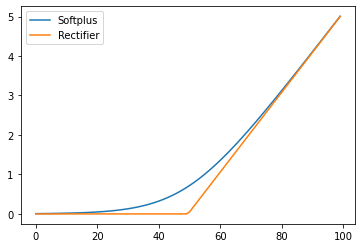

In [6]:
x = np.linspace(-5, 5, 100)
# def softplus(x):
#     return np.log(1+np.exp(x))
#or:
softplus = lambda x: np.log(1+np.exp(x))
# def rectifier(x):
#     return np.maximum(0, x)
# #or:
# rectifier = lambda x: np.maximum(0, x)
#or:
rectifier = lambda x: (x>0)*x

plt.plot(softplus(x), label='Softplus')
plt.plot(rectifier(x), label='Rectifier')
plt.legend()
# plt.ylim(-5, 5)
plt.show()

In [7]:
[coef.shape for coef in clf.coefs_]

[(2, 4), (4, 2), (2, 1)]

In [9]:
# The (non-bias) weights
# "coefs_ is a list of weight matrices, where weight matrix at index i 
# represents the weights between layer i and layer i+1"
for coef in clf.coefs_:
    print("weights:\n", coef)
# [coef for coef in clf.coefs_]

weights:
 [[4.97895 0.05498 -0.43250 -0.82713]
 [4.43404 -0.38135 -0.57489 0.62468]]
weights:
 [[-0.41900 8.08494]
 [-0.33837 0.65864]
 [0.66451 0.98892]
 [0.40510 0.89159]]
weights:
 [[1.21651]
 [4.15108]]


In [11]:
# The weigths for the bias unit
# called intercepts because for a 2d fit, it is the intercept on the verital axis
# remember otherwise the decision boundary line always passes through the origin.
# - layer 0 (4): the bias for the input layer needs to have five weights to the 5 hidden units
# - layer 1 (2): the bias for the first hidden layer (it has 5 units) needs to have 2 weights for the 2
# units in the second hidden layer.
# - layer2 (1): bias for the second hidden layer needs to have one weight for the output
# Note: the bias unit is not very strong, except for the output
clf.intercepts_

[array([-1.36071, -0.89131, -0.42229, -0.90832]),
 array([-0.26968, -1.57633]),
 array([-8.93763])]

In [11]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_coef_indptr',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_intercept_indptr',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_partial_fit',
 '_predict',
 '_random_state',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_hyperparameters',
 '_validate_input',
 'activation',
 'alpha',
 'batch_size',
 'beta_1',
 'beta_2',
 'classes_',
 'coefs_',
 'early_stopping',
 'epsilon',
 'fit',
 'get_params',
 'hidden_

In [12]:
'''
2018: you can't call the MLP classifier's decision_function this way anymore.

XH: 

This shows sklearn removed the attribute decision_function() and replaced it with predict_proba().

Notice the usage of hasattr().

From: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html
'''
print(X_test)
clf.predict(X_test) 

[[2.0, 2.0], [-1.0, -2.0]]


array([1, 0])

In [13]:
# The loss function (more or less opposite to the performance function)
clf.loss_

6.567468728078908e-05

In [14]:
# the output activation function is often different from the activation funcitons used in the hidden layers.
clf.out_activation_

'logistic'

## Clearly, 

Passing 47.6 through the logistic function, you will get a number very close to 1, and 
passing -8.8 through the logistica function, you will get a number very close to 0.

## Finally, digging into the source code (on github, 

## sklearn/neural_network/multilayer_perceptron.py),

## you will see that  sklearn uses what it calls a LabelBinarizer to turn floats into either 0 or 1:

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

## Breakout

## Now, our favorite problem the XOR

# End of Week 11-1